# CAP 6619 - Deep Learning, Summer 2022 - Dr Marques (Project 1) 
## Project 1: Handwritten Digit Classifier Using the MNIST Dataset
## Peter J Worth, PhD candidate (pworth2022)

Useful references and sources:

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://keras.io/examples/vision/mnist_convnet/

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

## TODO: README and NOTES 


### On Environment Build

So we build this environment locally on a Mac (macOS Monterey 12.4, M1 Max chip, 64GB of RAM), initially to get around what appears to be a reference error / defect with the import libraries -

'from tensorflow.keras.optimizers import SGD' gives a reference error, or warning in Google Colab

"Import "tensorflow.keras.optimizers" could not be resolved(reportMissingImports)"

So I attempt to build an environment locally, also to test out performance. The build is more involved than i thought because there are library dependencies, and a hardware error likely related to this M1 chip. Found a workaround by building python 3.7 with the necessary tensroflow and keras (and other) libraries on it but all of those libraries, and python versions, had to be installed manually. Took some doing, but with the assistance of anaconda (and minoconda) I did mange to get that all set up and now I can run the code both on Google Colab and locally and it looks like the library references are resolved properly.


### On Performance

From a performance standpoint, even without an accelerator on Google Colab (at around mid day Wedneday May 18) Google Colab for 500 epochs for this code took 13 min total, around 2 seconds a step while locally on my Mac it took more than three times that at almost 30 min.


### Notebook Code Additions and Modifications

I've played with the outline of this assignment template, getting to know the in line documentation and debugging capabilities of what I gather is called jupyter notebook (of which I did manage to get a local version installed but it is integrated with the debugger and has some issues). Quite convenient to keep everything together, but new for me as I usually keep code and comments separate from docs but here we are. I have updated the outline to keep things organized for myself, I hope this is acceptable.

Pls note that not all the code additions were completed authored by myself, what this means is that snippets of code I got from other online resources as well as some assistance (references and code snippets) from other classmates. Having said that the complete end to end work and flow and commentary is all mine. I am new to python, tensorflow and keras (and jupyter) so i needed help pulling some of these pieces together, in particular knowing which libraries to call for which functions as well as which references to use to look for code samples (your examples were necessary but not sufficient you could say). I expect to become more proficient navigating through these libraries as we move through the course material. 

Sidebar: There is an old story about a mechanic who comes into a big facilities plant and walks around for a bit and kicks a pipe and fixes the plant and then sends a 10,000 bill to the owner who then asks, 'but it only took you five minutes???' to which the engineer replies, $10 to kick the pipe and $9,900 to know which pipe to kick. 

The assignment structure facilitates this learning process and I am appreciative of that.



### Python and Data Types

So apparently Python is stringly, dynamically typed which when I look this up renders the following definition:

Strong typing means that the type of a value doesn't change in unexpected ways. A string containing only digits doesn't magically become a number, as may happen in Perl. Every change of type requires an explicit conversion.
Dynamic typing means that runtime objects (values) have a type, as opposed to static typing where variables have a type.
As for your example

bob = 1
bob = "bob"

This works because the variable does not have a type; it can name any object. After bob=1, you'll find that type(bob) returns int, but after bob="bob", it returns str. (Note that type is a regular function, so it evaluates its argument, then returns the type of the value.)

While this is very useful for programmers that like to fit an awful lot of functionality in very few lines of code (this is sort of like programmer's bragging rights you might say) this makes newcomeers to the language, and the libraries, very difficult because there dont apopear to be data types anywhwere... Anyway I thought I would bring this up becase readability and knowledge transfer of code suffers in these situations and when you work in teams this can be an issue. 

This is also me just complaining about python and how it handles data types which makes it harder to navigate code.


### Code Execution and Understanding

While certainly the code modifications and notebook herein (Assignment 1) have facilitated an understanding of not just python, jupyter notebooks and Google Colab, but also some of the basic calls and structures behind the tensorflow, keras and sklearn python libraries, my understanding is still only at what I would call the cursory level, which is probably to be expected and intended. 

The good news now is that I know how to learn, how to put code together in this context and basically what the underlying data structures do and how they come together to facilitate 'deep learning'.

All code delivered in this notebook runs on Google Colab. This has been confirmed before handing in the assignment. epochs=500 takes a long time obviously but imperative if any meaningful data is to be gleaned of course.


### Conclusion and Summary

While there are a myriad of different areas I could explore here within this code, different optimizers and the like for example, I presume that much of this will be the topics for subsequent assignments so in the interest of time I will conserve my efforts there. 

The nice thing about code generally is that once you have libraries and functions and samples you can begin to piece these together and expand these into an assortment of projects that solve various problems in the domain in question. This has basically been my MO in systems virtually my enteire career across a variety of systems and platforms - Java, C, C++, C#, Windows, Unix, Linux, SQL Server. Oracle... All of this code I still have, like a chipmunk who conserves everything in the event that one day perhaps, it will come in handy again.

This construiction of the edifice of knowledge, legos you call them in your slides (if this is Prof Marques reading this), is an area that I am interested in, and reflects my curiousity regarding Deep Learning in general and the underlying design patterns (and matehmatics) that underpins its effectiveness. 

Code itself, and machines, is a very good corrolary for the process of knowledge acquaiition generally (epistemology it is called in philosophical circles), even if by analogy - libraries built on libraries built on libraries, at its lowest level being represented by 0/1 (leaving quantum computing aside) and yet with this edifice all sorts of interesting problems can be solved in these frameworks that have been constructed - as we are doing in this class with python, tensorflow and keras among other libraries no doubt.

Why do deep learning techniques work and what do they have to say about the process of knowledge acauisition across the machine to human boundary (transhumanism-ish)? If interested, I just published a book in this area, specifically looking at quantum measurement theory as a loose correlary for how this proces works in the domain of human knowledge acquisition [https://www.researchgate.net/publication/360320490_Idealogical_Reference_Architecture_IRA_an_epistemological_interpretation_of_quantum_mechanics].

For now however, it is more learbning about how machines learn... look forward to assignment 2.


## Setup and Imports

In [1]:
#
# imports: 
# tensorflow and keras imports, note reference issue on Google Colab for tensorflow.keras.optimizers
# from tensorflow import keras
#
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from tensorflow import keras
from keras import optimizers

from tensorflow.keras.optimizers import SGD

from keras import layers

from matplotlib import pyplot as plt
import numpy as np

#
# Import datasets, classifiers and performance metrics
#
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Load and prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

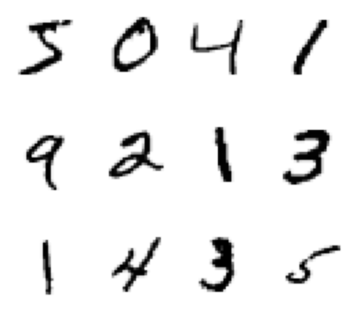

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

In [9]:
y_valid[0]

7

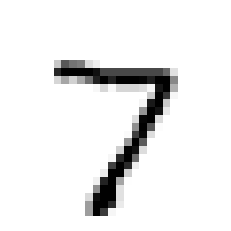

In [10]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [11]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [12]:
# convert class vectors to binary class matrices

from tensorflow import keras

y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [13]:
# y_validation:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## QUESTION 1: Explain the meaning and contents of X_training, y_training, X_validation and y_validation

The data set is split between training and validation data sets when it is first loaded:

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

6000 elements in the training data set and then 1000 elements in the validation data set, this data is basically configured for you when the data is loaded it appears.

The data set consists of images, 28x28 pixels, which is then in turn 'flattened' or 'reshaped' to 768 individual bytes and then 'scaled' to a value between 0 and 1 for processing (by dividing by 255). Note these operations are performed on both the training and validation data sets.

Each data set (again one for training and one for validation) has both an image, stored in the X matrix (X_training or X_validation respectively) as well as a corresponding value for the image which is its actual value between 0 and 9, the two (the image and its actual value) correlated by means of the index of the corresponding matrix. So the image in X_training[i] is specified in y_training[i] where 0 <= i < 6000 for the training data set and 0<= i < 1000 for the validation data set. 

Note that the y matrices value at index i is actually an array of values between 0 and 9 with the actual value of the image specified by a '1', or true, value in the index of that particular i index of the y matrix. So as in the example above, if the image of the very first image (at i=0) is equal to 7 then the array at index i=0 is actually [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]. Binary class matrices they are called it appears, converted with the lines 

y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In summary then, the X matrices (or tensors perhaps they are called) contains the flattened/reshaped and then scaled images themselves, in its training for (X_training) at 6000 elements and in its validation form (X_validation) at 1000 elements, each of which has a corresponding correct value stored in the corresponding index (index array really as described above) of the corrsponding y matrix, training (y_training) and validation (y_validation) respectively.


## PART 1 - Shallow neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

### QUESTION 2: Explain the meaning of the results you get when you run the model.summary (figure in Notebook below)

At this point we set up the 'model' (neural network basically) to train the network. Our first pass at this is to set up a simple neural network called a Sequential model (keras.model.Sequential). A Sequential model is appropriate for a network stack of layers where each layer has exactly one input (tensor) and one output (tensor). 

We add two layers to the Sequenetial model, both 'Dense', or 'fully connected', which means that each neuron in that layer receives input from ALL neurons of previous layers. The first layer is 64 'Units' (with Units indicating the  dimensionality of the output space) and is set up to utilize an activation function of 'sigmoid'. The input (shape) for this initial Dense layer corresponds to our images after they have been reshaped/flattened and scaled, ie (784,).

[Note that the activation function of a given layer is the function that is used to generate the output of the node. Without an activation function, a neural network is a simple linear regression model. This means the activation function gives non-linearity to the neural network. In the case of our first layer, we use a 'sigmoid' function as our activation function, a function which yields values between 0 and 1.] 

The second layer of our Sequential model is set to be 10 units, corresponding to the 10 possible values, or classifications of a given image. The activation function for this layer is the softmax activation function which is a function that yields numbers between 0 and 1, basically a probability distribution where one value (again between 0 and 1) is output for each of the 10 output values.  

(Some) References:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- https://keras.io/guides/sequential_model/
- https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks
- https://machinelearningmastery.com/softmax-activation-function-with-python/#:~:text=The%20softmax%20function%20is%20used%20as%20the%20activation%20function%20in,more%20than%20two%20class%20labels.

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### QUESTION 2 (cont)

The model summary table then reflects this structure, namely two 'Dense' layers, where the output of the first layer is 64 Units (or params) and the output of the second layer is 10 Units (or params). 

The total # of params of each layer is identified and then summarized, and the math as to how these Param numbers are calculated is conveniently provided below, or:

Layer1: Dense, Output 64, Input 784 (images): 
total params (64*784)+64 = 50,240

Layer2: Dense, Output 10, Input 64 (layer1 out): 
total params (64*10)+10 = 650

In [20]:
(64*784)

50176

In [21]:
(64*784)+64

50240

In [22]:
(10*64)+10

650

### Configure model

In [23]:
## Configure model
#
# here we define a new function to config the model and try different options
#

#define function to configure the model
def configure_model(model,loss,optimizer,metrics):    
    model.compile(
    loss=loss, 
    optimizer=optimizer, 
    metrics=metrics
)

configure_model(model,'mean_squared_error',SGD(learning_rate=0.01),['accuracy']) #1 option

#Try different options for `loss` and `optimizer`, for example:
#configure_model(model,'categorical_crossentropy','adam',['accuracy'])            #2 option


### Train the Model

In [24]:
## for testing
#epochs = 20

## for final run
epochs=500

batch_size=128

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/500
469/469 [==============================] - 6s 8ms/step - loss: 0.0932 - accuracy: 0.1456 - val_loss: 0.0922 - val_accuracy: 0.1648
Epoch 2/500
469/469 [==============================] - 3s 7ms/step - loss: 0.0919 - accuracy: 0.1697 - val_loss: 0.0913 - val_accuracy: 0.1884
Epoch 3/500
469/469 [==============================] - 3s 7ms/step - loss: 0.0911 - accuracy: 0.1928 - val_loss: 0.0906 - val_accuracy: 0.2112
Epoch 4/500
469/469 [==============================] - 4s 8ms/step - loss: 0.0905 - accuracy: 0.2124 - val_loss: 0.0901 - val_accuracy: 0.2288
Epoch 5/500
469/469 [==============================] - 4s 9ms/step - loss: 0.0900 - accuracy: 0.2242 - val_loss: 0.0897 - val_accuracy: 0.2375
Epoch 6/500
469/469 [==============================] - 3s 7ms/step - loss: 0.0896 - accuracy: 0.2321 - val_loss: 0.0893 - val_accuracy: 0.2442
Epoch 7/500
469/469 [==============================] - 3s 7ms/step - loss: 0.0892 - accuracy: 0.2374 - val_loss: 0.0889 - val_accuracy: 0.2495

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


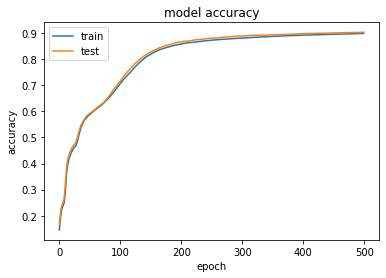

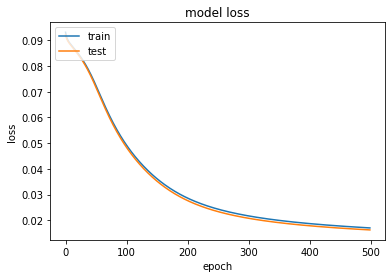

In [25]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### QUESTION 3: Does the model show any indication of overfitting? Why (not)?

On the definition of Overfitting and why it is important:

"Overfitting refers to an unwanted behavior of a machine learning algorithm used for predictive modeling. It is the case where model performance on the training dataset is improved at the cost of worse performance on data not seen during training, such as a holdout test dataset or new data. We can identify if a machine learning model has overfit by first evaluating the model on the training dataset and then evaluating the same model on a holdout test dataset.If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset. We care about overfitting because it is a common cause for “poor generalization” of the model as measured by high “generalization error.” That is error made by the model when making predictions on new data."

- https://machinelearningmastery.com/overfitting-machine-learning-models/

 
"Overfitting is a term used in statistics that refers to a modeling error that occurs when a function corresponds too closely to a particular set of data. As a result, overfitting may fail to fit additional data, and this may affect the accuracy of predicting future observations. Overfitting can be identified by checking validation metrics such as accuracy and loss. The validation metrics usually increase until a point where they stagnate or start declining when the model is affected by overfitting. During an upward trend, the model seeks a good fit, which, when achieved, causes the trend to start declining or stagnate. The performance can be measured using the percentage of accuracy observed in both data sets to conclude on the presence of overfitting. If the model performs better on the training set than on the test set, it means that the model is likely overfitting."

- https://corporatefinanceinstitute.com/resources/knowledge/other/overfitting/

**Our model does not appear to be overfitting, as evidenced by the similar effectiveness of the model on both the training and validation data sets. If the model was overfitting we would expect to see a much worse performance on the validation data set than on the training data set, for example.**

### Evaluate the model

In [27]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.9032


[0.0162374097853899, 0.9031999707221985]

### TODO: Display Confusion Matrix

*TODO*: Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides. See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

*Comments*: I have added two slightly different versions here to try and come to a better understanding of the options and underlying data elements. Apparently there are a lot of ways to do this. I cannot say that i fully understand the underlying data structures involved here as input parameters into the show and print functions but the code works and as an engineer this is the end goal ultimately.

The matrix itself is of course valuable as it tells you what the model got wrong, with a nice clean mapping - given the mnist dataset - of 0-9 on x axis and 0-9 on y-axis. The diagnal line in the middle is apparently everything that it got right (this was not self evident, I had to ask/look this up).



In [36]:
#
# imports for confusion matrix display
#
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import seaborn as sns

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.87      0.89      1032
           3       0.90      0.89      0.90      1010
           4       0.89      0.92      0.90       982
           5       0.87      0.81      0.84       892
           6       0.91      0.94      0.92       958
           7       0.91      0.90      0.91      1028
           8       0.87      0.87      0.87       974
           9       0.88      0.87      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Confusion matrix:
[[ 955    0    3    2    1    6    9    1    3    0]
 [   0 1103    3    5    0    2    5    1   16    0]
 [  15    4  901   13   14    1   20   21   35    8]
 [   4    1   22  898    1   34    3   1

<Figure size 360x360 with 0 Axes>

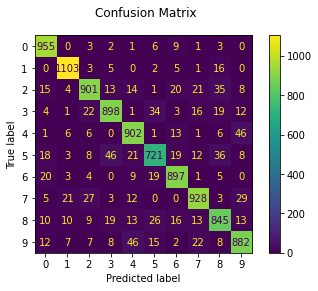

In [39]:
#sample one (from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

fig = plt.figure(figsize=(5, 5)) 

# Predict class probabilities => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]
y_pred = model.predict(X_validation) 

# Decode Predicted labels
Y_pred = np.argmax(y_pred, 1)

# Decode labels
Y_test = np.argmax(y_validation, 1) 

print(
    f"Classification report:\n"
    f"{metrics.classification_report(Y_test, Y_pred)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

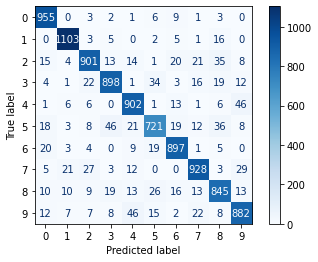

In [40]:
#sample two
probs = model.predict(X_validation)
pre_label = probs.argmax(axis=1)
y_label = y_validation.argmax(axis=1)

labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

cm = confusion_matrix(y_label, pre_label)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### TODO: Classifier Good matches (True) & Mistakes

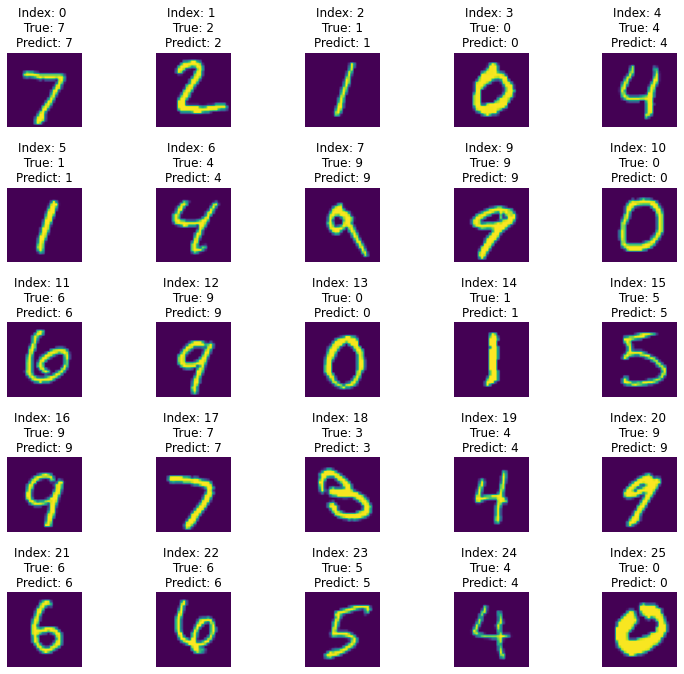

In [41]:
#############################
# True Predictions
#
yhat = model.predict(X_validation)
Y_true = np.argmax(y_validation, axis=1)
Y_pred_classes = np.argmax(yhat, axis=1)

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

right_classified_idx = np.where(Y_pred_classes == Y_true)[0]

for i in np.arange(0, R*C):
    axes[i].imshow(X_valid[right_classified_idx[i]])
    axes[i].set_title("Index: %s \n True: %s \nPredict: %s" % (right_classified_idx[i], labels[Y_true[right_classified_idx[i]]], labels[Y_pred_classes[right_classified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

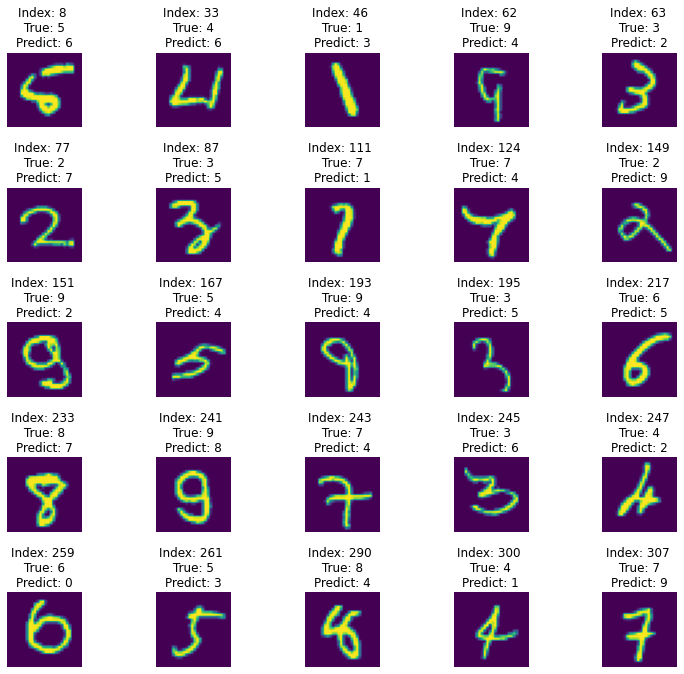

In [42]:
##################################
#False Predictions
#
R = 5
C = 5

yhat = model.predict(X_validation)
Y_true = np.argmax(y_validation, axis=1)
Y_pred_classes = np.argmax(yhat, axis=1)

fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]

axes[i].imshow(X_valid[misclassified_idx[i]])

for i in np.arange(0, R*C):
    axes[i].imshow(X_valid[misclassified_idx[i]])
    axes[i].set_title("Index: %s \n True: %s \nPredict: %s" % (misclassified_idx[i], labels[Y_true[misclassified_idx[i]]], labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## PART 2 - Convolutional neural network (CNN) architecture

In [14]:
model_cnn = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Configure model

In [15]:
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

### Prepare the data
The CNN does not expect the images to be flattened.

In [20]:
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Train!


In [21]:
batch_size=128
epochs=15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0356 - val_accuracy: 0.9931
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0371 - val_accuracy: 0.9938
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0373 - val_accuracy: 0.9934
Epoch 4/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0371 - val_accuracy: 0.9935
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0406 - val_accuracy: 0.9935
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0393 - val_accuracy: 0.9935
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0382 - val_accuracy: 0.9928
Epoch 

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


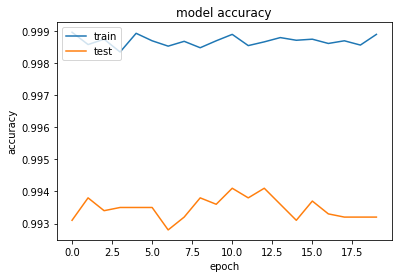

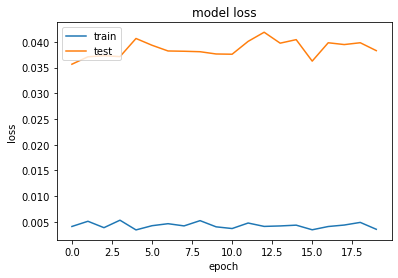

In [22]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### QUESTION 4: How do the accuracy and loss compare to the previous model? What can you infer from this comparison?

The loss numbers are low, very low, very quickly in the model as it is being built, ie it learns very quickly, much faster than in the previous model. We can infer therefore that the CNN architecture, at least in this case on this data set, performs better.

Note we ran the data set on 500 epochs and 20, doesnt really matter given the rate that it learns, ie as quickly as it learns and gets to peak (inside 99% accurate).

### Evaluate the model

In [23]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9932


[0.03828100115060806, 0.9932000041007996]